C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\2310218315.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\2310218315.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\2310218315.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

XGBoost RMSE: 10.55488085579731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 114624, number of used features: 21
[LightGBM] [Info] Start training from score 37.338725
LightGBM RMSE: 10.140683125063621


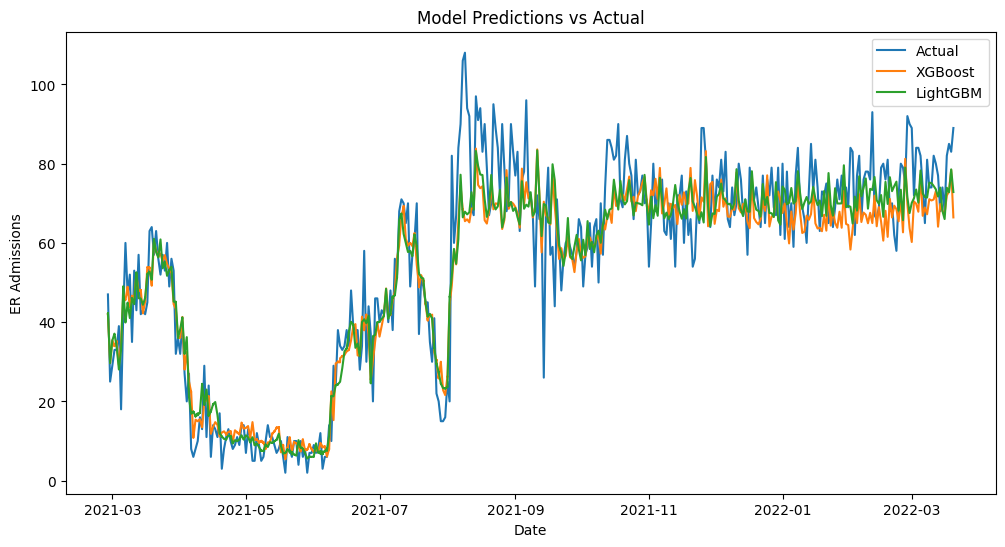

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the cleaned dataset
df = pd.read_csv("feature_engineering_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Optional: If you prefer OneHotEncoding for categorical features
# This is useful for non-ordinal categorical columns.
# If you prefer OneHotEncoding instead of LabelEncoding, uncomment the next lines:
# encoder = ColumnTransformer(
#     transformers=[('cat', OneHotEncoder(), categorical_columns)],
#     remainder='passthrough'  # leave non-categorical columns unchanged
# )
# X = encoder.fit_transform(X)

# Train-test split (Time series typically uses time order, so don't shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ========== XGBoost ==========
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost RMSE: {xgb_rmse}")

# ========== LightGBM ==========
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
print(f"LightGBM RMSE: {lgb_rmse}")

# ========== Plot Predictions ==========
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost')
plt.plot(y_test.index, lgb_pred, label='LightGBM')
plt.legend()
plt.title("Model Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\1342932813.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\1342932813.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_24544\1342932813.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
XGBoost RMSE after Hyperparameter Tuning: 10.222271953167441
Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 114624, number of used features: 21
[LightGBM] [Info] Start training from score 37.338725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

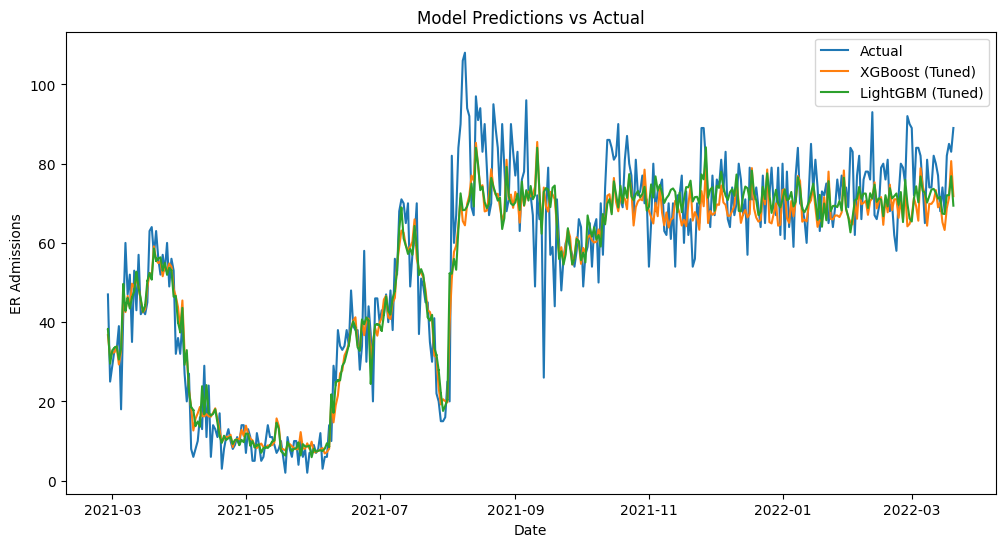

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("feature_engineering_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split (Time series typically uses time order, so don't shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ========== Hyperparameter Tuning for XGBoost ==========

# Define hyperparameters grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best XGBoost hyperparameters
print(f"Best XGBoost Parameters: {xgb_grid_search.best_params_}")

# Best model predictions
xgb_best_model = xgb_grid_search.best_estimator_
xgb_pred = xgb_best_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost RMSE after Hyperparameter Tuning: {xgb_rmse}")

# ========== Hyperparameter Tuning for LightGBM ==========

# Define hyperparameters grid for LightGBM
lgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV for LightGBM
lgb_grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=lgb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
lgb_grid_search.fit(X_train, y_train)

# Best LightGBM hyperparameters
print(f"Best LightGBM Parameters: {lgb_grid_search.best_params_}")

# Best model predictions
lgb_best_model = lgb_grid_search.best_estimator_
lgb_pred = lgb_best_model.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
print(f"LightGBM RMSE after Hyperparameter Tuning: {lgb_rmse}")

# ========== Plot Predictions ==========

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost (Tuned)')
plt.plot(y_test.index, lgb_pred, label='LightGBM (Tuned)')
plt.legend()
plt.title("Model Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()
